<a id="top"></a>
# **1.3 Calculate elastic stiffness of a given composite**

[![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=551801)

## Task
Predict the tensile stiffness of a reinforced concrete cross section shown in the Figure with the thickness of 10~mm and width of 100 mm.
The cross-section is reinforced with 6 layers of textile fabrics made of CAR-EP3300 specified in the table below

![image.png](../fig/mixture_rule_elastic.png)
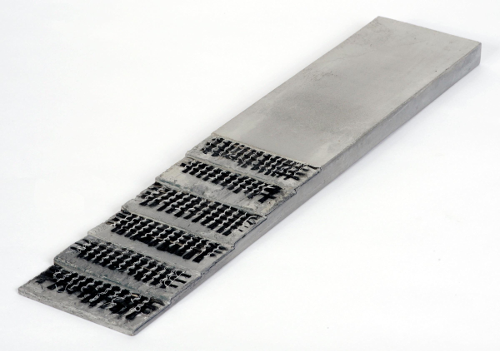

## Theory
The derived mixture rule will be used to solve the task

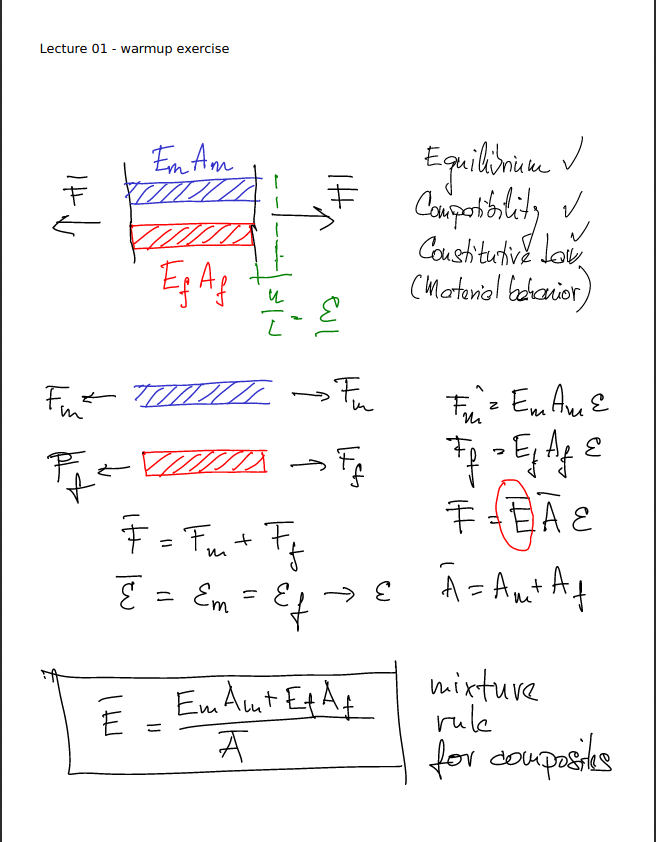

## Data

\begin{array}{|c|c|c|c|c|c|}
    \mathrm{Label}
    & \mathrm{Material}
    & \mathrm{Area }
    & \mathrm{Grid\; spacing}
    & \mathrm{Stiffness}
    & \mathrm{Strength\; (characteristic)}
    \\ 
  \hline 
    &     
    & [\mathrm{mm}^2]
    & [\mathrm{mm}]
    & [\mathrm{MPa}]
    & [\mathrm{Mpa}]
    \\ 
   \hline
    \mathrm{CAR-EP3300}
    & \mathrm{carbon/proxy}
    & 1.84
    & 25.77
    & 240000
    & 3500
    \\
   \hline
    \mathrm{solidian\; GRID \; Q95}
    & \mathrm{carbon/proxy}
    & 3.62
    & 36.0
    & 240000
    & 3200
    \\ 
\end{array}

# How to evaluate an expression?

**Calculator:** Let us use Python language as a calculator and evalute the mixture rule for the exemplified cross-section.m

In [1]:
A_roving = 1.84 # [mm**2] 
n_layers = 6 # - 
spacing = 25.77 # [mm] 
thickness = 10 # [mm] 
width = 100 # [mm] 
E_carbon = 240000 # [MPa] 
E_concrete = 28000 # [MPa]

In [2]:
A_composite = width * thickness
n_rovings = width / spacing
A_layer = n_rovings * A_roving
A_carbon = n_layers * A_layer 
A_concrete = A_composite - A_carbon 
E_composite = (E_carbon * A_carbon + E_concrete * A_concrete) / A_composite
E_composite

37082.18859138533

Thus, the composite has an effective stiffness of 37 GPa.

# How to construct a model?

Once we have derived the formula capturing the design question, i.e. "what is the stiffness of the new composite?" we want to learn from the model and develop a new intuition. To explore the possible composite designs let us rewrite the above equations as symbolic expressions. Then, we can construct a model which can be interactively used to study the available design options.

In contrast to the previously performed numerical evaluation, we now express the derived equations as mathematical symbols instead of numbers. To do this, let us use a Python package `sympy` to do symbolic algebra.

In [3]:
import sympy as sp

The parameters of the model are now introduced as `sympy.symbols`. To distinguish the symbols from numbers introduced above, let us name the Python variables referring to the mathematical symbols with a trailing underscore `_`

In [4]:
A_roving_ = sp.Symbol('A_r')
n_layers_ = sp.Symbol('n_l')
spacing_ = sp.Symbol('d')
thickness_ = sp.Symbol('h')
width_ = sp.Symbol('b')
E_carbon_ = sp.Symbol('E_car')
E_concrete_ = sp.Symbol('E_c')

To see the difference between a variable referring to a number and to a symbol, let us display the variables `A_roving` and `A_roving_`

In [5]:
display(A_roving, A_roving_)

1.84

A_r

Let us now rephrase the the above derived equations in the symbolic form, i.e. using the symbols with the trailing underscore `_`

In [6]:
A_composite_ = width_ * thickness_
n_rovings_ = width_ / spacing_
A_layer_ = n_rovings_ * A_roving_
A_carbon_ = n_layers_ * A_layer_ 
A_concrete_ = A_composite_ - A_carbon_ 
E_composite_ = (E_carbon_ * A_carbon_ + E_concrete_ * A_concrete_) / A_composite_
sp.simplify(E_composite_)

(A_r*E_car*n_l - E_c*(A_r*n_l - d*h))/(d*h)

**The power of modeling**

 - Instead of a number, we have now a symbolic expression showing the influence of the individual parameters on a design property, i.e. on the material stiffness $\bar{E}$. 

 - This expression represents the first model that we constructuted in the course using the conditions of compatibility, equilibrium and constitutive laws.

 - Using a model, we can explore the behavior of the composite, develop a design intuition, optimize the design.
   We learn how to construct simple models describing the mechanisms governing the behavior of a composite.
   
 - We will construct simplified analytical models for pull-out, that will help us to understand elementary types of
   material behavior.
 

# Next steps

 - Login to jupyter.rwth-aachen.de
 - Navigate to this mixture rule example
 - Evaluate the cells by issueing the [Shift+Return] key combination

# Why Jupyter Lab? Why Python?
 - [Jupyterlab introduction](https://youtu.be/A5YyoCKxEOU) [7 mins] video explaining the basic features of jupyter notebook within jupyter lab 
 - [Most Popular Programming Languages 1965 - 2019](https://www.youtube.com/watch?v=Og847HVwRSI) Check this race of programming languages over the last 50 years and wait till the end of it ;-)
 - Useful packages
   - `matplotlib` - how to plot fancy diagrams  
   - `sympy` - how to perform algebraic manipulations
   - `numpy` - how to manipulate data - beyond `Excel`
   will be shortly explained.

<div style="background-color:lightgray;text-align:left;width:45%;display:inline-table;"> <img src="../icons/previous.png" alt="Previous trip" width="50" height="50">
    &nbsp; <a href="1_1_scope.ipynb#top">1.2 Jupyter basics</a> 
</div><div style="background-color:lightgray;text-align:center;width:10%;display:inline-table;"> <a href="#top"><img src="../icons/compass.png" alt="Compass" width="50" height="50"></a></div><div style="background-color:lightgray;text-align:right;width:45%;display:inline-table;"> 
    <a href="../tour2_constant_bond/2_1_1_PO_observation.ipynb#top">2.1 Pullout of elastic fiber from rigid matrix</a>&nbsp; <img src="../icons/next.png" alt="Previous trip" width="50" height="50"> </div> 